In [1]:
import pandas as pd
from matplotlib import rc as rc
from matplotlib import pyplot as plt
import numpy as np 
# The available datasets are: breast_cancer, dermatology, ecoli, iris, olivetti_faces, pendigits, waveform_v1, wine
# 1.1075595203585957, 0.2447219772863289, 1.7161230364840334, 3.633944119437154, 0.004945063173230718, , 1.4534823391903635, 1.63528264957219
user="maria"
dataset_name = "waveform_v1"
K = 50
n_inits = 100
gamma = 1.4534823391903635

# Load the CSV file
#df_global = pd.read_csv(f'C:\\Users\\{user}\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\laplacian\\{n_inits}\\{gamma}\\GlobalKernelKMeans_Dataset_{dataset_name}_Kernel_laplacian_K_{K}_Inits_{n_inits}_Results.csv')
df_global_pp_batch = pd.read_csv(f'C:\\Users\\{user}\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\laplacian\\{n_inits}\\{gamma}\\GlobalKernelKMeans_Dataset_{dataset_name}_Sampling_batch_Kernel_laplacian_K_50_Inits_{n_inits}_Results.csv')
df_global_pp_sequential = pd.read_csv(f'C:\\Users\\{user}\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\laplacian\\{n_inits}\\{gamma}\\GlobalKernelKMeans_Dataset_{dataset_name}_Sampling_sequential_Kernel_laplacian_K_50_Inits_{n_inits}_Results.csv')
df_random = pd.read_csv(f'C:\\Users\\{user}\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\laplacian\\{n_inits}\\{gamma}\\KernelKMeans_Dataset_{dataset_name}_Init_random_Kernel_laplacian_K_50_Inits_{n_inits}_Results.csv')
df_pp = pd.read_csv(f'C:\\Users\\{user}\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\laplacian\\{n_inits}\\{gamma}\\KernelKMeans_Dataset_{dataset_name}_Init_k-means++_Kernel_laplacian_K_50_Inits_{n_inits}_Results.csv')
#df_forgy = pd.read_csv(f'C:\\Users\\{user}\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\laplacian\\{n_inits}\\{gamma}\\KernelKMeans_Dataset_{dataset_name}_Init_forgy_Kernel_laplacian_K_50_Inits_{n_inits}_Results.csv')

In [2]:
# List of DataFrames
dfs = {'df_global_pp_batch': df_global_pp_batch, 'df_global_pp_sequential': df_global_pp_sequential, 'df_pp': df_pp, 'df_random': df_random}

# Iterate over the dictionary to sum the 'execution_time' column for each DataFrame
for df_name, df in dfs.items():
    total_execution_time = round(df['EXECUTION TIME'].sum(), 2)
    print(f"Total Execution Time for {df_name} (rounded): {total_execution_time}") 

Total Execution Time for df_global (rounded): 6.71
Total Execution Time for df_global_pp_batch (rounded): 4.59
Total Execution Time for df_global_pp_sequential (rounded): 5.12
Total Execution Time for df_pp (rounded): 64.09
Total Execution Time for df_random (rounded): 11.17


In [3]:
def percentage_error(base_mse, to_compare_mse):
    return ((to_compare_mse - base_mse) / (base_mse)) * 100

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:72: SyntaxWarning: invalid escape sequence '\%'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:72: SyntaxWarning: invalid escape sequence '\%'
C:\Users\maria\AppData\Local\Temp\ipykernel_11488\211618415.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_pp['MSE']), label="kernel $k$-means$\mathbb{++}$", c="tab:gray", s=markersize)
C:\Users\maria\AppData\Local\Temp\ipykernel_11488\211618415.py:38: SyntaxWarning: invalid escape sequence '\m'
  ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_global_pp_batch['MSE']), label="global kernel $k$-m

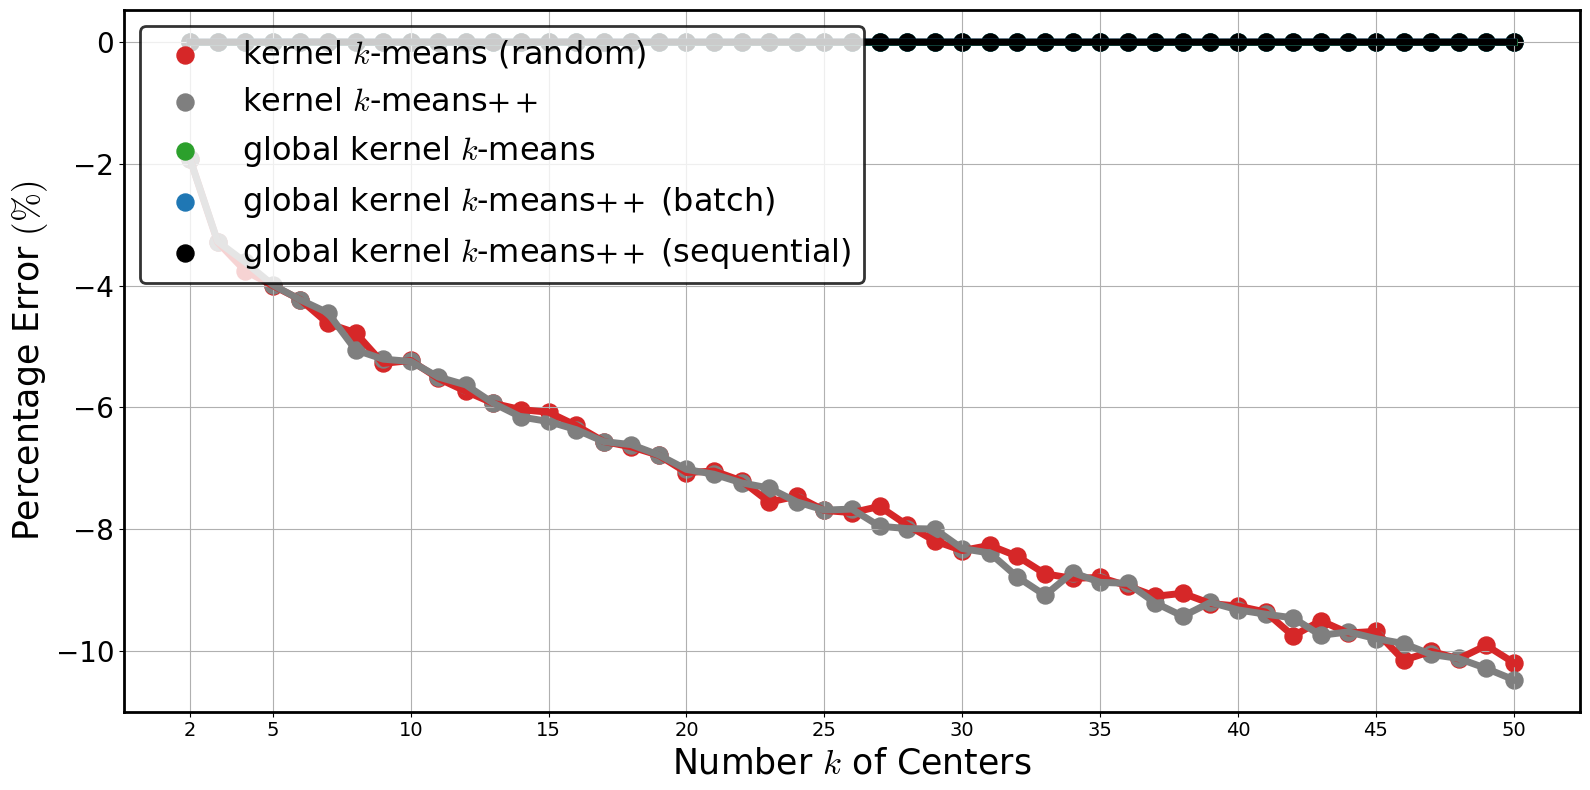

In [4]:
rc('mathtext', fontset = 'cm')
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
fig, ax1 = plt.subplots(figsize=(16, 8),)


#fig.suptitle("Comparison of k-means seeding algorithms", fontsize=20)

centroids_range = np.arange(2, 51)
# ax1 setting
#ax1.set_yscale("log", base=10)
ax1.set_xticks(ticks=centroids_range)

#ax1.xaxis.set_ticklabels([])
#plt.ylim([-95, 5])

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2.0)

linestyle = 'solid'
linewidth = 5
markersize = 150

# Global k-means

#ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_forgy['MSE']), linestyle=linestyle, linewidth=linewidth, c='tab:brown')
#ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_forgy['MSE']), label="kernel $k$-means (forgy)", s=markersize,c='tab:brown')

ax1.plot(centroids_range, percentage_error(df_global_pp_batch['MSE'],   df_random['MSE']), linestyle=linestyle, linewidth=linewidth, c="tab:red")
ax1.scatter(centroids_range, percentage_error(df_global_pp_batch['MSE'], df_random['MSE']), label = "kernel $k$-means (random)", s=markersize, c="tab:red")

ax1.plot(centroids_range, percentage_error(df_global_pp_batch['MSE'], df_pp['MSE']), linestyle=linestyle, linewidth=linewidth, color="tab:gray")
ax1.scatter(centroids_range, percentage_error(df_global_pp_batch['MSE'], df_pp['MSE']), label="kernel $k$-means$\mathbb{++}$", c="tab:gray", s=markersize)

#ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_global['MSE']), linestyle=linestyle, linewidth=linewidth, c="tab:green")
#ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_global['MSE']), label="global kernel $k$-means", s=markersize, c="tab:green")

ax1.plot(centroids_range, percentage_error(df_global_pp_batch['MSE'], df_global_pp_batch['MSE']), linestyle=linestyle, linewidth=linewidth, c="tab:blue")
ax1.scatter(centroids_range, percentage_error(df_global_pp_batch['MSE'], df_global_pp_batch['MSE']), label="global kernel $k$-means$\mathbb{++}$ (batch)", c="tab:blue", s=markersize)

ax1.plot(centroids_range, percentage_error(df_global_pp_batch['MSE'], df_global_pp_sequential['MSE']), linestyle=linestyle, linewidth=linewidth, c="black")
ax1.scatter(centroids_range, percentage_error(df_global_pp_batch['MSE'], df_global_pp_sequential['MSE']), label="global kernel $k$-means$\mathbb{++}$ (sequential)", c="black", s=markersize)

"""
# Global k-means++ batch
#if gl_km_pp:

ax1.plot(centroids_range, cl_df['random'], linestyle=linestyle, linewidth=linewidth,c="tab:brown")
ax1.scatter(centroids_range, cl_df['random'], label="random", s=markersize, c="tab:brown")

# Global k-means++ sequential
if gl_km_pp_cand:
    ax1.plot(centroids_range, cl_df["Gl k-means$++$ sequential"], linestyle=linestyle, linewidth=linewidth, c="black")
    ax1.scatter(centroids_range, cl_df["Gl k-means$++$ sequential"], label="global $k$-means$\mathbb{++}$(sequential)", c="black", s=markersize)


# Fast Global k-means
if gl_fast:
    ax1.plot(centroids_range, cl_df["Fast global"], linestyle=linestyle, linewidth=linewidth, c='tab:orange')
    ax1.scatter(centroids_range, cl_df["Fast global"], label="fast global $k$-means", s=markersize,c='tab:orange')

# k-means++
if km_pp:
    ax1.plot(centroids_range, cl_df["k-means$++$"], linestyle=linestyle, linewidth=linewidth, c="tab:red")
    ax1.scatter(centroids_range, cl_df["k-means$++$"], label="$k$-means$\mathbb{++}$", s=markersize, c="tab:red")

# random k-means
if random:
    ax1.plot(centroids_range, cl_df['random'], linestyle=linestyle, linewidth=linewidth,c="tab:brown")
    ax1.scatter(centroids_range, cl_df['random'], label="percentage_error(df_global['MSE'], df_global_pp_sequential['MSE']),", s=markersize, c="tab:brown")
"""

ax1.set_ylabel("Percentage Error $(\%)$", fontsize=25)
ax1.grid(True)
# get the legend object
leg1 = ax1.legend(loc="upper left", framealpha=0.8, fontsize=23)
leg1.get_frame().set_linewidth(2.0)
leg1.get_frame().set_edgecolor("black")

plt.xticks(fontsize=14)
plt.yticks(fontsize=20)
xticks = list(np.arange(5, 51, 5))
plt.xticks([2] + xticks)

plt.xlabel("Number $k$ of Centers", fontsize=25)
plt.tight_layout()
plt.savefig(f'C:\\Users\\{user}\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\laplacian\\{n_inits}\\{gamma}\\Dataset_{dataset_name}_Kernel_laplacian_Algorithms_Comparison_Graph.png')
plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
C:\Users\maria\AppData\Local\Temp\ipykernel_11488\1684302478.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax1.scatter(centroids_range, df_pp['ITERATIONS'], label="kernel $k$-means$\mathbb{++}$", c="tab:gray", s=markersize)
C:\Users\maria\AppData\Local\Temp\ipykernel_11488\1684302478.py:38: SyntaxWarning: invalid escape sequence '\m'
  ax1.scatter(centroids_range, df_global_pp_batch['ITERATIONS'], label="global kernel $k$-means$\mathbb{++}$ (batch)", c="tab:blue", s=markersize)
C:\Users\maria\AppData\Local\Temp\ipykernel_11488\1684302478.py:41: SyntaxWarning: invalid escape sequ

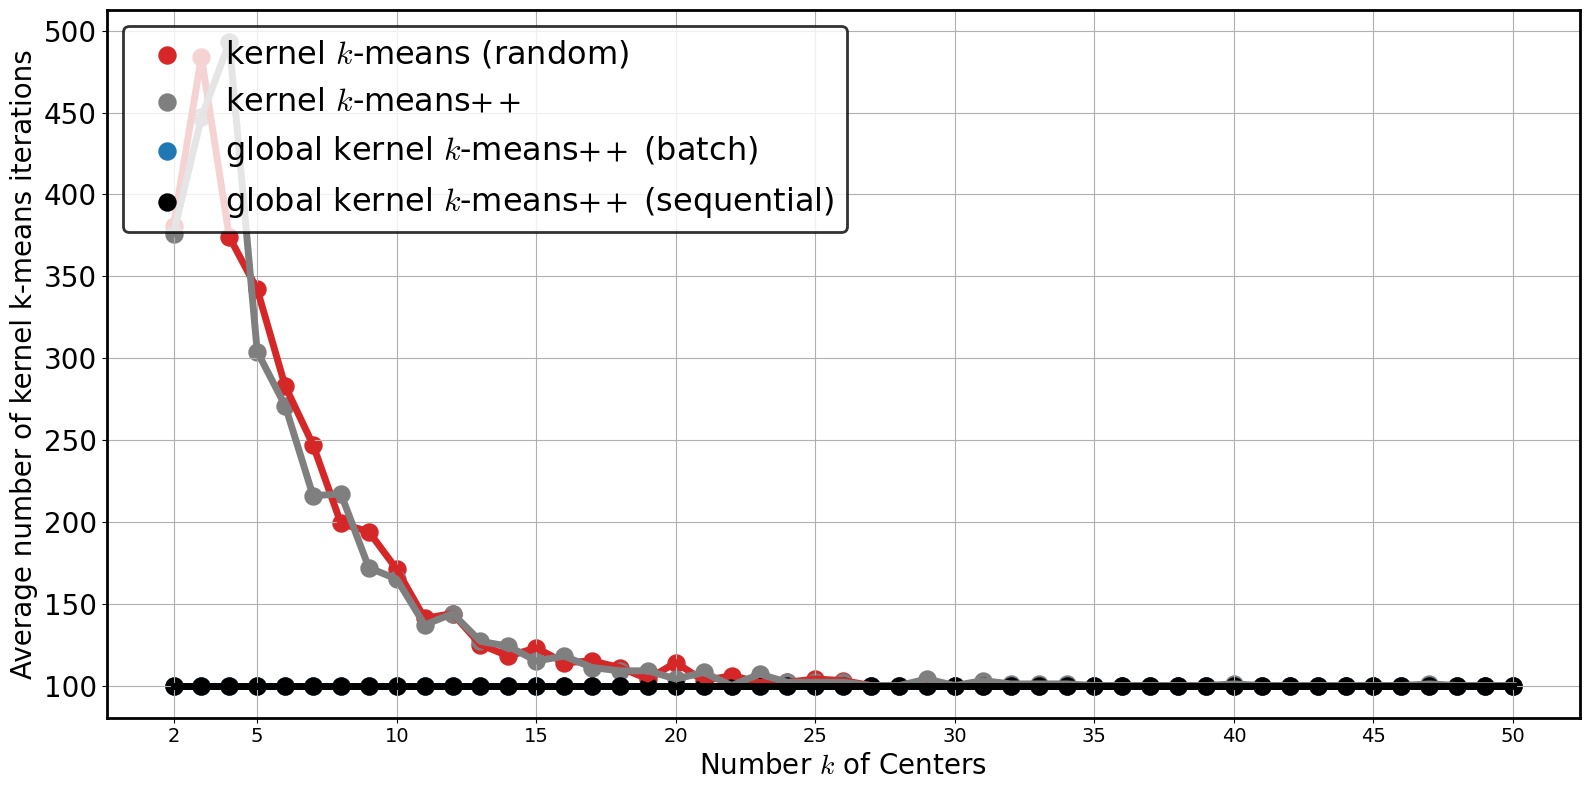

In [5]:
rc('mathtext', fontset = 'cm')
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
fig, ax1 = plt.subplots(figsize=(16, 8),)


#fig.suptitle("Comparison of k-means seeding algorithms", fontsize=20)

centroids_range = np.arange(2, 51)
# ax1 setting
#ax1.set_yscale("log", base=10)
ax1.set_xticks(ticks=centroids_range)

#ax1.xaxis.set_ticklabels([])
#plt.ylim([-1, 20])

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2.0)

linestyle = 'solid'
linewidth = 5
markersize = 150

# Global k-means

#ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_forgy['MSE']), linestyle=linestyle, linewidth=linewidth, c='tab:brown')
#ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_forgy['MSE']), label="kernel $k$-means(forgy)", s=markersize,c='tab:brown')

ax1.plot(centroids_range, df_random['ITERATIONS'], linestyle=linestyle, linewidth=linewidth, c="tab:red")
ax1.scatter(centroids_range, df_random['ITERATIONS'], label = "kernel $k$-means (random)", s=markersize, c="tab:red")

ax1.plot(centroids_range, df_pp['ITERATIONS'], linestyle=linestyle, linewidth=linewidth, color="tab:gray")
ax1.scatter(centroids_range, df_pp['ITERATIONS'], label="kernel $k$-means$\mathbb{++}$", c="tab:gray", s=markersize)

#ax1.plot(centroids_range, df_global['ITERATIONS'], linestyle=linestyle, linewidth=linewidth, c="tab:green")
#ax1.scatter(centroids_range, df_global['ITERATIONS'], label="global kernel $k$-means", s=markersize, c="tab:green")

ax1.plot(centroids_range, df_global_pp_batch['ITERATIONS'], linestyle=linestyle, linewidth=linewidth, c="tab:blue")
ax1.scatter(centroids_range, df_global_pp_batch['ITERATIONS'], label="global kernel $k$-means$\mathbb{++}$ (batch)", c="tab:blue", s=markersize)

ax1.plot(centroids_range, df_global_pp_sequential['ITERATIONS'], linestyle=linestyle, linewidth=linewidth, c="black")
ax1.scatter(centroids_range, df_global_pp_sequential['ITERATIONS'], label="global kernel $k$-means$\mathbb{++}$ (sequential)", c="black", s=markersize)

"""
# Global k-means++ batch
#if gl_km_pp:

ax1.plot(centroids_range, cl_df['random'], linestyle=linestyle, linewidth=linewidth,c="tab:brown")
ax1.scatter(centroids_range, cl_df['random'], label="random", s=markersize, c="tab:brown")

# Global k-means++ sequential
if gl_km_pp_cand:
    ax1.plot(centroids_range, cl_df["Gl k-means$++$ sequential"], linestyle=linestyle, linewidth=linewidth, c="black")
    ax1.scatter(centroids_range, cl_df["Gl k-means$++$ sequential"], label="global $k$-means$\mathbb{++}$(sequential)", c="black", s=markersize)


# Fast Global k-means
if gl_fast:
    ax1.plot(centroids_range, cl_df["Fast global"], linestyle=linestyle, linewidth=linewidth, c='tab:orange')
    ax1.scatter(centroids_range, cl_df["Fast global"], label="fast global $k$-means", s=markersize,c='tab:orange')

# k-means++
if km_pp:
    ax1.plot(centroids_range, cl_df["k-means$++$"], linestyle=linestyle, linewidth=linewidth, c="tab:red")
    ax1.scatter(centroids_range, cl_df["k-means$++$"], label="$k$-means$\mathbb{++}$", s=markersize, c="tab:red")

# random k-means
if random:
    ax1.plot(centroids_range, cl_df['random'], linestyle=linestyle, linewidth=linewidth,c="tab:brown")
    ax1.scatter(centroids_range, cl_df['random'], label="percentage_error(df_global['MSE'], df_global_pp_sequential['MSE']),", s=markersize, c="tab:brown")
"""

ax1.set_ylabel("Average number of kernel k-means iterations", fontsize=20)
ax1.grid(True)
# get the legend object
leg1 = ax1.legend(loc="upper left", framealpha=0.8, fontsize=23)
leg1.get_frame().set_linewidth(2.0)
leg1.get_frame().set_edgecolor("black")

plt.xticks(fontsize=14)
plt.yticks(fontsize=20)
xticks = list(np.arange(5, 51, 5))
plt.xticks([2] + xticks)

plt.xlabel("Number $k$ of Centers", fontsize=20)
plt.tight_layout()
plt.savefig(f'C:\\Users\\{user}\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\{dataset_name}\\Laplacian\\{n_inits}\\{gamma}\\Dataset_{dataset_name}_Kernel_Laplacian_Algorithms_Iteration_Comparison_Graph.png')
plt.show()